In [63]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [64]:
df = pd.read_csv('FinalProjectData/Study_C.csv')
df = df[df['LeadStatus'] != 'Flagged']

In [65]:
df[df['TxGroup'] == 'Control']

,Study,Country,PatientID,SiteID,RaterID,AssessmentID,TxGroup,VisitDay,P1,P2,...,G9,G10,G11,G12,G13,G14,G15,G16,PANSS_Total,LeadStatus
0,C,Korea,30001,60088,90373,301017,Control,0,3,4,...,3,3,3,4,4,1,2,1,84,Passed
1,C,Korea,30001,60088,90373,308004,Control,21,3,4,...,3,1,2,4,4,1,2,1,80,Passed
2,C,Korea,30001,60088,90373,304775,Control,28,3,3,...,2,1,2,4,4,1,2,1,70,Passed
3,C,Korea,30001,60088,90373,310369,Control,56,2,3,...,2,1,2,4,4,1,2,1,68,Passed
4,C,Korea,30001,60088,90373,313218,Control,84,1,3,...,1,1,2,4,4,1,2,1,65,Passed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13701,C,USA,31618,60182,90089,312705,Control,78,3,2,...,3,3,2,3,2,2,2,2,72,Passed
13702,C,USA,31618,60182,90089,311802,Control,106,3,2,...,3,3,2,3,2,2,2,2,72,Passed
13703,C,USA,31618,60182,90089,313478,Control,133,3,2,...,3,3,2,3,2,2,2,3,71,Passed
13704,C,USA,31618,60182,90089,306702,Control,133,3,2,...,3,3,2,3,2,2,2,3,71,Assign to CS


In [66]:
df[df['TxGroup'] == 'Treatment']

,Study,Country,PatientID,SiteID,RaterID,AssessmentID,TxGroup,VisitDay,P1,P2,...,G9,G10,G11,G12,G13,G14,G15,G16,PANSS_Total,LeadStatus
52,C,Brazil,30007,60132,90134,309888,Treatment,0,4,3,...,3,2,3,4,4,3,4,4,83,Passed
53,C,Brazil,30007,60132,90132,301069,Treatment,12,4,2,...,3,2,2,4,3,2,4,4,76,Passed
54,C,Brazil,30007,60132,90132,305522,Treatment,19,3,2,...,3,2,3,3,4,1,4,3,74,Passed
55,C,Brazil,30007,60132,90134,300526,Treatment,46,3,2,...,3,3,3,3,4,3,3,3,74,Passed
60,C,China,30009,60157,90335,313284,Treatment,0,2,4,...,2,2,3,4,3,2,3,3,74,Passed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13706,C,Portugal,31619,60128,90161,302514,Treatment,0,5,2,...,2,1,2,2,2,1,2,3,73,Passed
13707,C,Taiwan,31620,60185,90328,308981,Treatment,0,4,2,...,2,3,1,4,2,1,3,3,73,Passed
13708,C,Taiwan,31620,60185,90328,308982,Treatment,6,4,3,...,2,3,2,4,2,1,3,3,75,Passed
13709,C,Taiwan,31620,60185,90328,304959,Treatment,13,4,2,...,2,3,1,5,2,1,3,3,72,Passed


In [67]:
df_panss = df[['PatientID', 'VisitDay', 'PANSS_Total']][df['TxGroup'] == 'Treatment']

In [68]:
df_panss

,PatientID,VisitDay,PANSS_Total
52,30007,0,83
53,30007,12,76
54,30007,19,74
55,30007,46,74
60,30009,0,74
...,...,...,...
13706,31619,0,73
13707,31620,0,73
13708,31620,6,75
13709,31620,13,72


In [69]:
df_panss_diff = pd.DataFrame(columns=['PatientID', 'PANSS_Total_Diff'])

for patient_id in df_panss['PatientID'].unique():
    patient_panss = df_panss[df_panss['PatientID'] == patient_id]
    patient_panss_diff = patient_panss.iloc[-1]['PANSS_Total'] - patient_panss.iloc[0]['PANSS_Total']
    df_panss_diff = df_panss_diff.append({'PatientID': patient_id, 'PANSS_Total_Diff': patient_panss_diff}, ignore_index=True)
    
df_panss_diff

,PatientID,PANSS_Total_Diff
0,30007,-9
1,30009,-6
2,30013,-40
3,30014,7
4,30016,-14
...,...,...
764,31614,-42
765,31615,7
766,31616,-24
767,31619,0


In [70]:
df_panss_diff['Effective'] = df_panss_diff['PANSS_Total_Diff'] <= 0
df_panss_diff

,PatientID,PANSS_Total_Diff,Effective
0,30007,-9,True
1,30009,-6,True
2,30013,-40,True
3,30014,7,False
4,30016,-14,True
...,...,...,...
764,31614,-42,True
765,31615,7,False
766,31616,-24,True
767,31619,0,True


True     675
False     94
Name: Effective, dtype: int64 

True     0.877763
False    0.122237
Name: Effective, dtype: float64


Text(0.5, 1.0, 'Treatment Group')

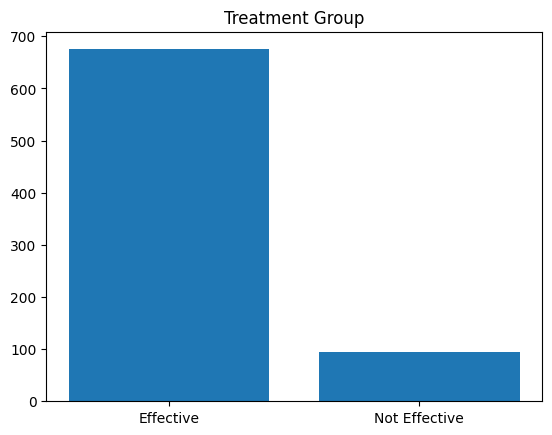

In [71]:
print(df_panss_diff['Effective'].value_counts(), '\n')
print(df_panss_diff['Effective'].value_counts(normalize=True))
plt.bar(['Effective', 'Not Effective'], [len(df_panss_diff[df_panss_diff['Effective'] == True]), len(df_panss_diff[df_panss_diff['Effective'] == False])])
plt.title('Treatment Group')

In [72]:
df_panss_control = df[['PatientID', 'VisitDay', 'PANSS_Total']][df['TxGroup'] == 'Control']

df_panss_control_diff = pd.DataFrame(columns=['PatientID', 'PANSS_Total_Diff'])

for patient_id in df_panss_control['PatientID'].unique():
    patient_panss = df_panss_control[df_panss_control['PatientID'] == patient_id]
    patient_panss_diff = patient_panss.iloc[-1]['PANSS_Total'] - patient_panss.iloc[0]['PANSS_Total']
    df_panss_control_diff = df_panss_control_diff.append({'PatientID': patient_id, 'PANSS_Total_Diff': patient_panss_diff}, ignore_index=True)
    
df_panss_control_diff

,PatientID,PANSS_Total_Diff
0,30001,-34
1,30002,-13
2,30003,0
3,30004,-22
4,30005,-29
...,...,...
846,31608,-4
847,31609,-41
848,31610,-20
849,31617,39


In [73]:
df_panss_control_diff['Effective'] = df_panss_control_diff['PANSS_Total_Diff'] <= 0
df_panss_control_diff

,PatientID,PANSS_Total_Diff,Effective
0,30001,-34,True
1,30002,-13,True
2,30003,0,True
3,30004,-22,True
4,30005,-29,True
...,...,...,...
846,31608,-4,True
847,31609,-41,True
848,31610,-20,True
849,31617,39,False


True     758
False     93
Name: Effective, dtype: int64 

True     0.890717
False    0.109283
Name: Effective, dtype: float64


Text(0.5, 1.0, 'Control Group')

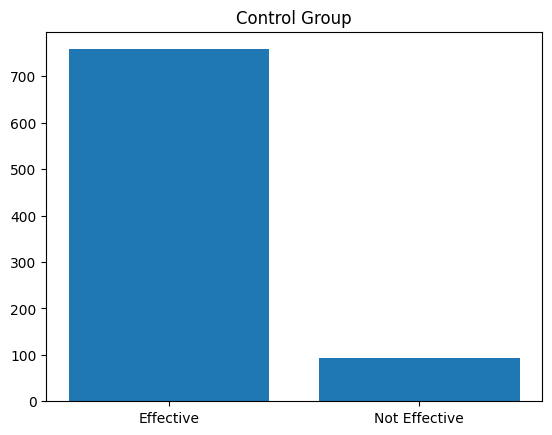

In [74]:
print(df_panss_control_diff['Effective'].value_counts(), '\n')
print(df_panss_control_diff['Effective'].value_counts(normalize=True))
plt.bar(['Effective', 'Not Effective'], [len(df_panss_control_diff[df_panss_control_diff['Effective'] == True]), len(df_panss_control_diff[df_panss_control_diff['Effective'] == False])])
plt.title('Control Group')

In [75]:
df_panss['PatientID'].value_counts()

30140    22
31075    22
30573    21
30151    20
30682    20
         ..
30466     1
30738     1
30932     1
31209     1
31447     1
Name: PatientID, Length: 769, dtype: int64

In [76]:
df_panss['PatientID'].value_counts()[df_panss['PatientID'].value_counts() >= 3]

30140    22
31075    22
30573    21
30151    20
30682    20
         ..
30761     3
30754     3
30959     3
31354     3
30954     3
Name: PatientID, Length: 662, dtype: int64

In [77]:
df_panss_effective = pd.DataFrame(columns=['PatientID', 'Effective'])

for patient_id in df_panss['PatientID'].value_counts()[df_panss['PatientID'].value_counts() >= 3].index:
    patient_panss = df_panss[df_panss['PatientID'] == patient_id]
    effective = False
    for i in range(len(patient_panss) - 2):
        if patient_panss.iloc[i]['PANSS_Total'] > patient_panss.iloc[i + 1]['PANSS_Total'] > patient_panss.iloc[i + 2]['PANSS_Total']:
            effective = True
            break
    df_panss_effective = df_panss_effective.append({'PatientID': patient_id, 'Effective': effective}, ignore_index=True)
    
df_panss_effective

,PatientID,Effective
0,30140,True
1,31075,True
2,30573,True
3,30151,True
4,30682,True
...,...,...
657,30761,True
658,30754,False
659,30959,True
660,31354,False


True     559
False    103
Name: Effective, dtype: int64 

True     0.844411
False    0.155589
Name: Effective, dtype: float64


Text(0.5, 1.0, 'Treatment Group')

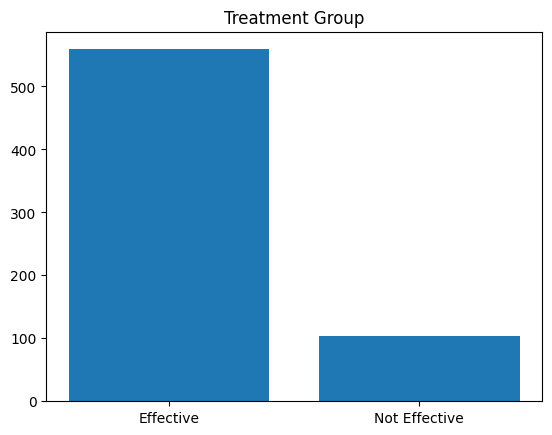

In [78]:
print(df_panss_effective['Effective'].value_counts(), '\n')
print(df_panss_effective['Effective'].value_counts(normalize=True))
plt.bar(['Effective', 'Not Effective'], [len(df_panss_effective[df_panss_effective['Effective'] == True]), len(df_panss_effective[df_panss_effective['Effective'] == False])])
plt.title('Treatment Group')

In [79]:
df_panss_control

,PatientID,VisitDay,PANSS_Total
0,30001,0,84
1,30001,21,80
2,30001,28,70
3,30001,56,68
4,30001,84,65
...,...,...,...
13701,31618,78,72
13702,31618,106,72
13703,31618,133,71
13704,31618,133,71


In [80]:
df_panss_control['PatientID'].value_counts()

30040    23
30569    21
30487    20
30608    20
30055    20
         ..
30347     1
30344     1
31123     1
30340     1
30690     1
Name: PatientID, Length: 851, dtype: int64

In [81]:
df_panss_control['PatientID'].value_counts()[df_panss_control['PatientID'].value_counts() >= 3]

df_panss_control_effective = pd.DataFrame(columns=['PatientID', 'Effective'])

for patient_id in df_panss_control['PatientID'].value_counts()[df_panss_control['PatientID'].value_counts() >= 3].index:
    patient_panss = df_panss_control[df_panss_control['PatientID'] == patient_id]
    effective = False
    for i in range(len(patient_panss) - 2):
        if patient_panss.iloc[i]['PANSS_Total'] > patient_panss.iloc[i + 1]['PANSS_Total'] > patient_panss.iloc[i + 2]['PANSS_Total']:
            effective = True
            break
    df_panss_control_effective = df_panss_control_effective.append({'PatientID': patient_id, 'Effective': effective}, ignore_index=True)
    
df_panss_control_effective

,PatientID,Effective
0,30040,False
1,30569,True
2,30487,True
3,30608,True
4,30055,True
...,...,...
744,31000,False
745,30748,False
746,31248,False
747,30282,False


True     619
False    130
Name: Effective, dtype: int64 

True     0.826435
False    0.173565
Name: Effective, dtype: float64


Text(0.5, 1.0, 'Control Group')

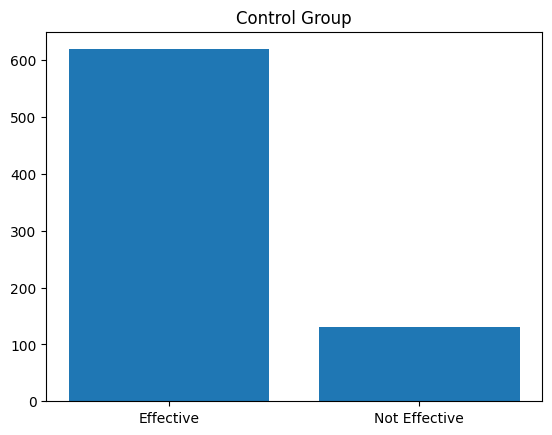

In [82]:
print(df_panss_control_effective['Effective'].value_counts(), '\n')
print(df_panss_control_effective['Effective'].value_counts(normalize=True))
plt.bar(['Effective', 'Not Effective'], [len(df_panss_control_effective[df_panss_control_effective['Effective'] == True]), len(df_panss_control_effective[df_panss_control_effective['Effective'] == False])])
plt.title('Control Group')